# RAI/USD vs ETH/USD, WIP

Compare RAI/USD and ETH/USD

In [1]:
import os
import time
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from web3 import Web3, HTTPProvider

from abis import ORACLE_RELAYER, ORACLE_RELAYER_ABI
from abis import FSM, FSM_ABI

from mp import fetch, fetch_link_mp, fetch_rp, fetch_fsm

size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,12),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

In [2]:
# Need an archive node
#ETH_RPC_URL=os.environ['ETH_RPC_URL']
ETH_RPC_URL='https://eth-mainnet.alchemyapi.io/v2/fnqkEt7-LptDIrq8uGem99usR6vUGqq7'
web3 = Web3(HTTPProvider(endpoint_uri=ETH_RPC_URL, request_kwargs={"timeout": 10}))

In [3]:
first_block = 12371493
interval = 100
num_blocks = None

latest_block = web3.eth.getBlock("latest")['number']

if not num_blocks:
    last_block = latest_block - 12
else:
    last_block = min(latest_block - 12, first_block + num_blocks)

print(f"first block {first_block}, last_block {last_block}")
blocks = list(range(first_block, last_block + 1, interval))

first block 12371493, last_block 15029001


In [4]:
start = time.time()
results = fetch(fetch_fsm, 8, FSM, FSM_ABI, ETH_RPC_URL, blocks=blocks)
print(f"took {time.time() - start}")

took 945.6246819496155


In [5]:
df = pd.DataFrame(results, columns = ['block', 'result', 'valid', 'next_result', 'next_valid'])
df['result'] = df['result'].astype(float)
df['next_result'] = df['next_result'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26576 entries, 0 to 26575
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   block        26576 non-null  int64  
 1   result       26576 non-null  float64
 2   valid        26576 non-null  bool   
 3   next_result  26576 non-null  float64
 4   next_valid   26576 non-null  bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 674.9 KB


In [14]:
df_uniq = df.drop_duplicates(subset=["result"], keep="first").reset_index()


In [15]:
df_uniq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2110 non-null   int64  
 1   block        2110 non-null   int64  
 2   result       2110 non-null   float64
 3   valid        2110 non-null   bool   
 4   next_result  2110 non-null   float64
 5   next_valid   2110 non-null   bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 70.2 KB


In [16]:
df_uniq['ret_1'] = df_uniq['result'] / df_uniq['result'].shift(1)
df_uniq['ret_2'] = df_uniq['result'] / df_uniq['result'].shift(2)

array([[<AxesSubplot:title={'center':'ret_1'}>,
        <AxesSubplot:title={'center':'ret_2'}>]], dtype=object)

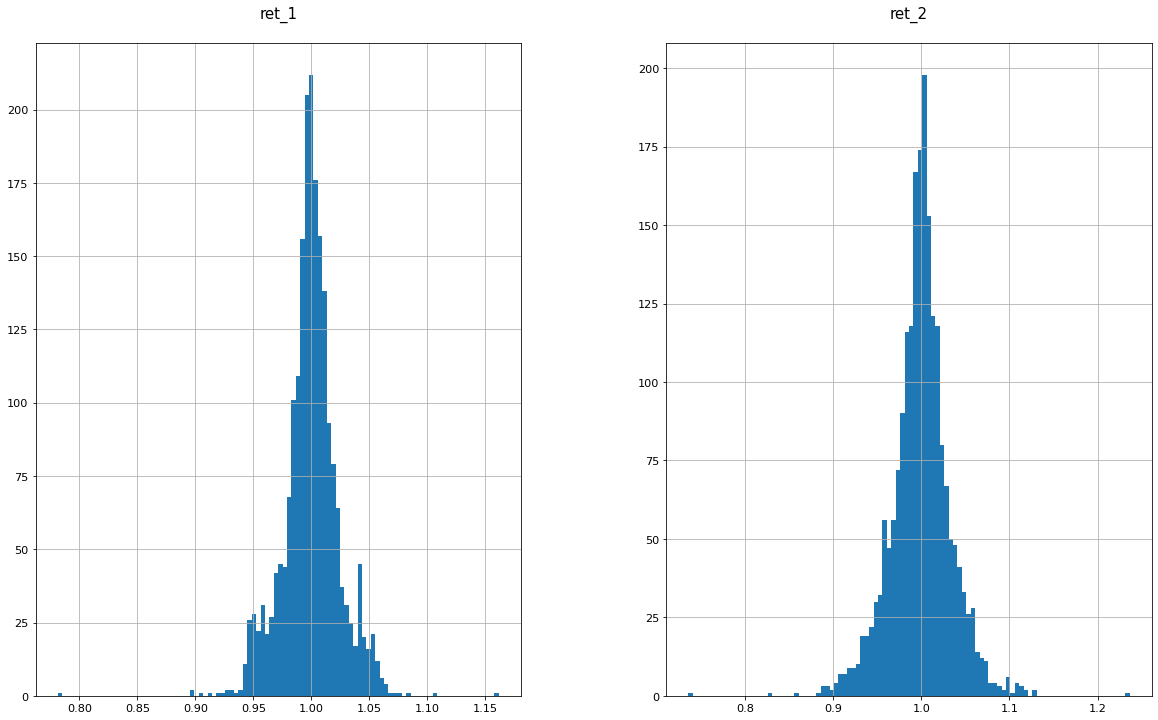

In [17]:
df_uniq[['ret_1', 'ret_2']].hist(bins=100)


In [18]:
df_uniq[df_uniq['ret_1'] < 0.80].head(4)

,index,block,result,valid,next_result,next_valid,ret_1,ret_2
254,938,12465293,2.090794e+21,True,2.428922e+21,True,0.781141,0.736038


In [23]:
df_sample = df[(df['block'] > 12463000) & (df['block'] < 12468000)]
               
#12465293
df_sample.head(30)

,block,result,valid,next_result,next_valid
916,12463093,3.094619e+21,True,2.927851e+21,True
917,12463193,3.094619e+21,True,2.927851e+21,True
918,12463293,3.094619e+21,True,2.927851e+21,True
919,12463393,2.927851e+21,True,2.948269e+21,True
920,12463493,2.927851e+21,True,2.948269e+21,True
921,12463593,2.927851e+21,True,2.948269e+21,True
922,12463693,2.927851e+21,True,2.948269e+21,True
923,12463793,2.927851e+21,True,2.948269e+21,True
924,12463893,2.927851e+21,True,2.948269e+21,True
925,12463993,2.948269e+21,True,2.976820e+21,True
